In [3]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set_style("darkgrid")
from sklearn import linear_model
import random

import warnings
warnings.filterwarnings('ignore')


/usr/lib/python3/dist-packages/matplotlib/__init__.py:874: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


Decripcion de los datos
                x           y
count   133.00000  133.000000
mean   1946.00000    8.528271
std      38.53786    0.629293
min    1880.00000    6.920000
25%    1913.00000    8.100000
50%    1946.00000    8.430000
75%    1979.00000    8.890000
max    2012.00000   10.410000


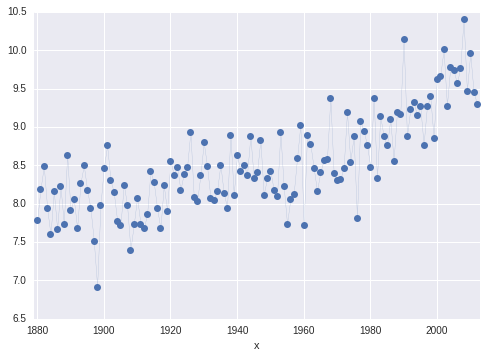

In [4]:
# Levanto los datos
df = pd.read_csv('./data/worldTemperature.csv', ' ')
print("Decripcion de los datos")
print(df.describe())

# print("\nLas primeras 8 filas de los datdos")
# print(df.head(8))

# Graficos los datos
ax = sns.tsplot(time=df['x'], data=df['y'], interpolate=False)
sns.plt.show()

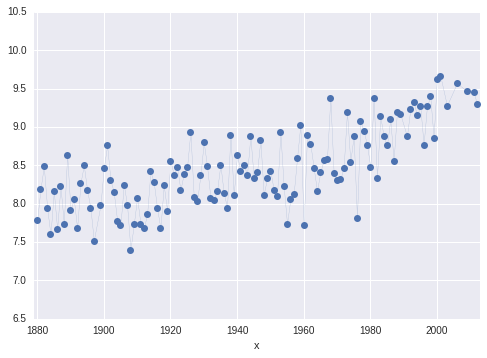

In [9]:
# Limpio los outliers
def mascara_outliers(s):
    return abs(s - s.mean()) <= 2*s.std()
    
mascara = mascara_outliers(df['y'])
df = df[mascara]
sns.tsplot(time=df['x'], data=df['y'], interpolate=False)

# Para que se evidencien mejor los outliers que saque, grafico en el mismo rango
# Algunos me parecen que no deberian ser removidos
sns.plt.ylim((6.5, 10.5))
sns.plt.show()

In [10]:
# Uso cuadrados minimos para predecir
sns.tsplot(time=df['x'], data=df['y'], interpolate=False)

def armar_matriz_A(s):
    temp = []
    for t in s:
        temp.append([20*np.cos(5*t),1000*np.cos(60*t),10*np.sin(50*t),t, 1])
    return np.array(temp)

def entrenar_y_predecir_en_rangos(df, rango_entrenamiento, rango_prediccion):
    regr = linear_model.LinearRegression(fit_intercept=False)

    # Entreno el modelo
    df_e = df[df['x'].isin(rango_entrenamiento)]
    A_e = armar_matriz_A(df_e['x'])
    regr.fit(A_e, df_e['y'])

    # Me fijo la aproximacion que se realizo
    df_e['p'] = regr.predict(A_e)
    sns.tsplot(time=df_e['x'], data=df_e['p'], color='r')

    # Realizo predicciones
    df_p = df[df['x'].isin(rango_prediccion)]

    A_p = armar_matriz_A(df_p['x'])
    df_p['p'] = regr.predict(A_p)
    sns.tsplot(time=df_p['x'], data=df_p['p'], color='g')

    ECM = sum((df_p['p']-df_p['y'])**2)
    return ECM

def predecir(k):
    return entrenar_y_predecir_en_rangos(df, range(k-35,k), range(k,k+10))

Error de prediccion: 0.76
Error de prediccion: 2.01
Error de prediccion: 0.26
Error promedio: 1.00932520452


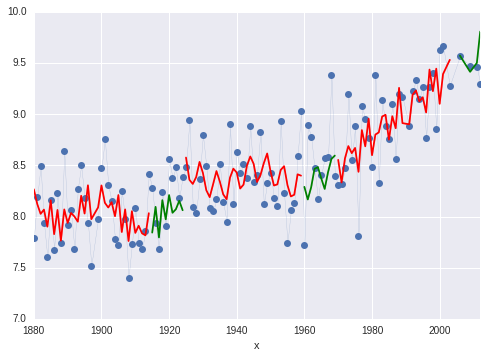

In [11]:

ECM1= predecir(1915)
print("Error de prediccion: {:.2f}".format(ECM1))    

ECM2= predecir(1960)
print("Error de prediccion: {:.2f}".format(ECM2))    

ECM3= predecir(2005)
print("Error de prediccion: {:.2f}".format(ECM3))

print ("Error promedio:",(ECM1+ECM2+ECM3)/3)

sns.plt.xlim((1880, 2012))
sns.plt.show()

In [12]:
# Un par de cosas mas de pandas
# years = [2004]*6 + [2005]*6 + [2006]*6
# delays = list(np.random.randn(6)+80) + list(np.random.randn(6)+5) + list(np.random.randn(6)+50)
# delays[2] = 5
# delays[7] = 80

# df1 = pd.DataFrame({
#     'year': years,
#     'delay': delays
# })

# print df1

# # Groupby y sacar outliers
# mascara = df1.groupby('year')['delay'].apply(mascara_outliers)
# df1 = df1[mascara]
# print df1

# # Groupby y calcular promedio
# promedio = df1.groupby('year').aggregate(['mean', 'std', 'count'])
# print promedio

In [68]:
# Levanto los datos
df = pd.read_csv('./data/GlobalLandTemperaturesByCountry.csv')
print("Decripcion de los datos")
#Me quedo con los que nos interesan. Elegí algunos representantes que tenían "mas o menos" sentido por el clima
#La idea es despues refinar esto haciendo el promedio de un conjunto de representantes
df2 = df[(df.Country == "Ecuador") | (df.Country == "Zambia")  | (df.Country == "Canada") | (df.Country == "Mongolia") | (df.Country == "Italy") | (df.Country == "Ukrayne") | (df.Country == "Egypt") | (df.Country == "Paraguay") | (df.Country == "Germany") ]





Decripcion de los datos


,dt,AverageTemperature,AverageTemperatureUncertainty,Country
97255,1768-09-01,5.257,3.107,Canada
97256,1768-10-01,-3.393,2.981,Canada
97257,1768-11-01,-12.829,3.967,Canada
97258,1768-12-01,-20.582,4.622,Canada
97259,1769-01-01,-24.756,4.722,Canada
97260,1769-02-01,-22.915,2.871,Canada
97261,1769-03-01,-16.862,3.359,Canada
97262,1769-04-01,-5.292,3.154,Canada
97263,1769-05-01,4.857,4.409,Canada
97264,1769-06-01,11.971,2.941,Canada
